In [492]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [493]:
from sklearn.datasets import load_iris
data = load_iris()

In [494]:
type(data)

sklearn.utils._bunch.Bunch

In [495]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [496]:
df = pd.DataFrame(data['data'], columns=data['feature_names']).assign(species=data['target'])

In [497]:
import seaborn as sns

In [498]:
# df.head().style.background_gradient(cmap='coolwarm')
df.head().style.background_gradient(cmap=sns.cubehelix_palette(as_cmap=True))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.100000,3.500000,1.400000,0.200000,0
1,4.900000,3.000000,1.400000,0.200000,0
2,4.700000,3.200000,1.300000,0.200000,0
3,4.600000,3.100000,1.500000,0.200000,0
4,5.000000,3.600000,1.400000,0.200000,0


In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [500]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [501]:
df.describe().T.style.background_gradient(cmap=sns.cubehelix_palette(as_cmap=True))

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.000000,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000
sepal width (cm),150.000000,3.057333,0.435866,2.000000,2.800000,3.000000,3.300000,4.400000
petal length (cm),150.000000,3.758000,1.765298,1.000000,1.600000,4.350000,5.100000,6.900000
petal width (cm),150.000000,1.199333,0.762238,0.100000,0.300000,1.300000,1.800000,2.500000
species,150.000000,1.000000,0.819232,0.000000,0.000000,1.000000,2.000000,2.000000


In [502]:
df.describe(include='all').T.style.background_gradient(cmap=sns.cubehelix_palette(as_cmap=True))

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.000000,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000
sepal width (cm),150.000000,3.057333,0.435866,2.000000,2.800000,3.000000,3.300000,4.400000
petal length (cm),150.000000,3.758000,1.765298,1.000000,1.600000,4.350000,5.100000,6.900000
petal width (cm),150.000000,1.199333,0.762238,0.100000,0.300000,1.300000,1.800000,2.500000
species,150.000000,1.000000,0.819232,0.000000,0.000000,1.000000,2.000000,2.000000


In [503]:
df.species.value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [504]:
x = df.drop('species', axis=1)
y = df.species

<center style="background-color: #006a4e; color:white"><font size = "5"><h2>EDA</h2></center>

In [505]:
x.shape

(150, 4)

In [506]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [507]:
x.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [508]:
x.nunique()  # number of unique values

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
dtype: int64

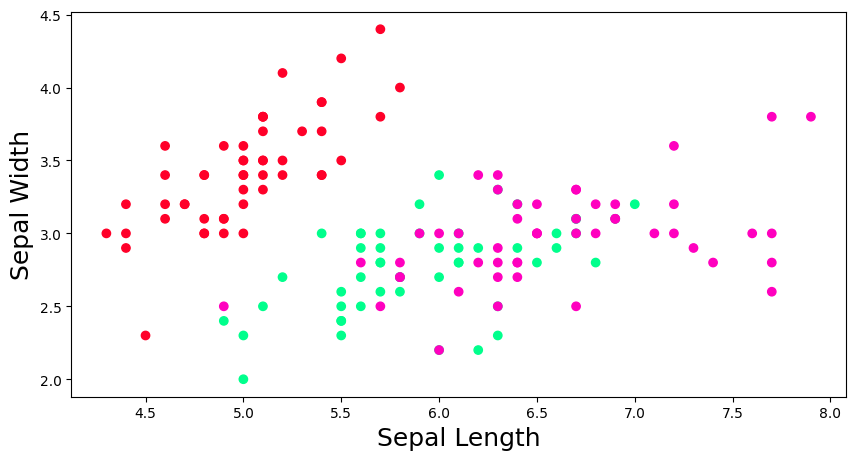

In [509]:
# graph of all features
fig = plt.figure(figsize=(10, 5))
plt.scatter(x['sepal length (cm)'], x['sepal width (cm)'], c=y, cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)
plt.show()

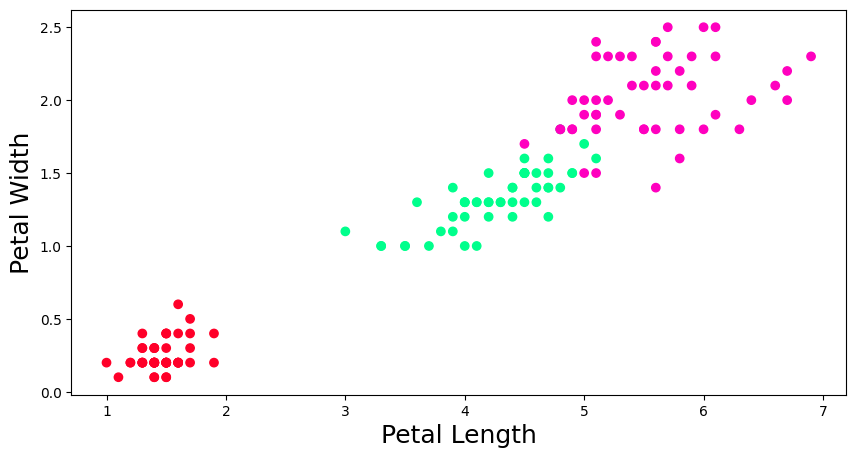

In [510]:
plt.figure(figsize=(10, 5))
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c=y, cmap='gist_rainbow')
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

<center style="background-color: #006a4e; color:white"><font size = '5'>data splitting</center>

In [511]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [512]:
type(x_train)

pandas.core.frame.DataFrame

In [513]:
from sklearn.cluster import KMeans

In [514]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

C:\Users\ratan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ratan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ratan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the v

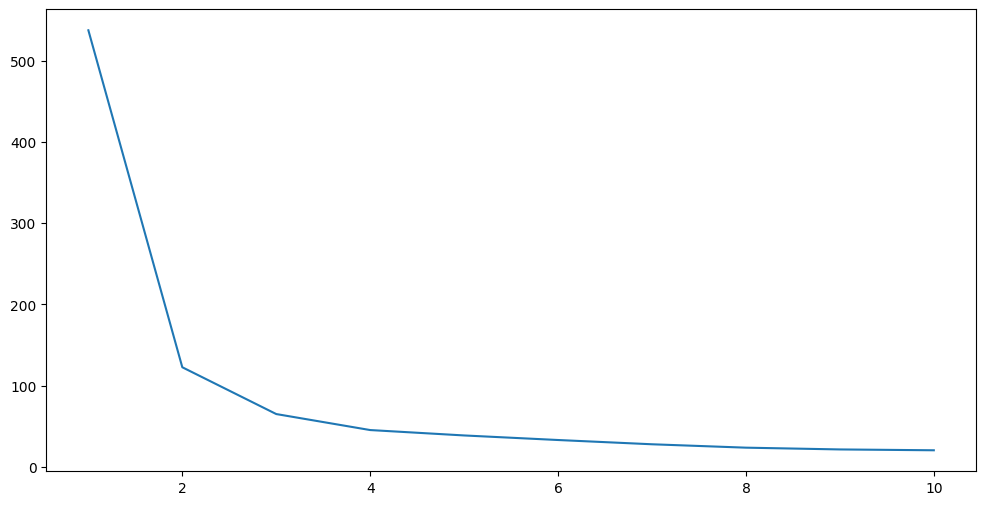

In [515]:
# elbow method
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss)

In [516]:
from kneed import KneeLocator

In [517]:
knee = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing', online=True, S=1)

In [518]:
knee.elbow

3

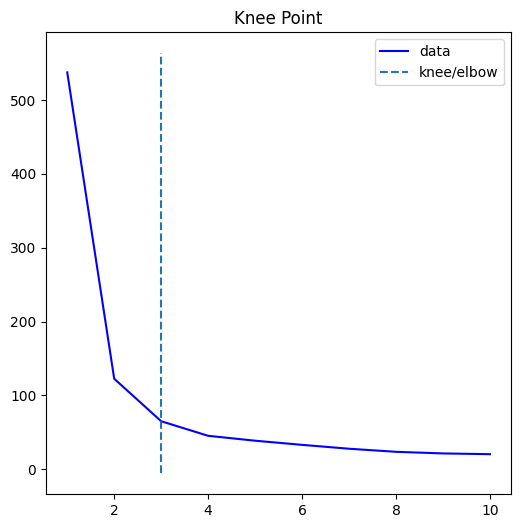

In [519]:
knee.plot_knee()

In [520]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [521]:
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [522]:
from sklearn.cluster import KMeans  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

In [523]:
y_train_labels = kmeans.fit_predict(x_train_std)

C:\Users\ratan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [524]:
kmeans.cluster_centers_.shape

(3, 4)

In [525]:
kmeans.cluster_centers_

array([[ 1.21518289,  0.18056564,  1.02316679,  1.02945275],
       [-0.99853884,  0.87386315, -1.30465921, -1.25253455],
       [-0.00339323, -0.87049345,  0.39195456,  0.3431796 ]])

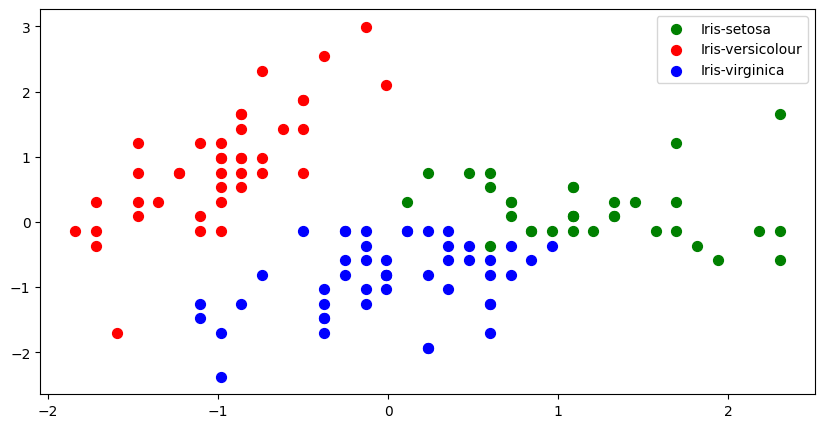

In [526]:
# plot the graph which shows the clusters
plt.figure(figsize=(10, 5))
plt.scatter(x_train_std[y_train_labels == 0, 0], x_train_std[y_train_labels == 0, 1], s=50, c='green', label='Iris-setosa')
plt.scatter(x_train_std[y_train_labels == 1, 0], x_train_std[y_train_labels == 1, 1], s=50, c='red', label='Iris-versicolour')
plt.scatter(x_train_std[y_train_labels == 2, 0], x_train_std[y_train_labels == 2, 1], s=50, c='blue', label='Iris-virginica')
plt.legend()


In [527]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

Text(0.5, 1.0, 'K-Means Clustering')

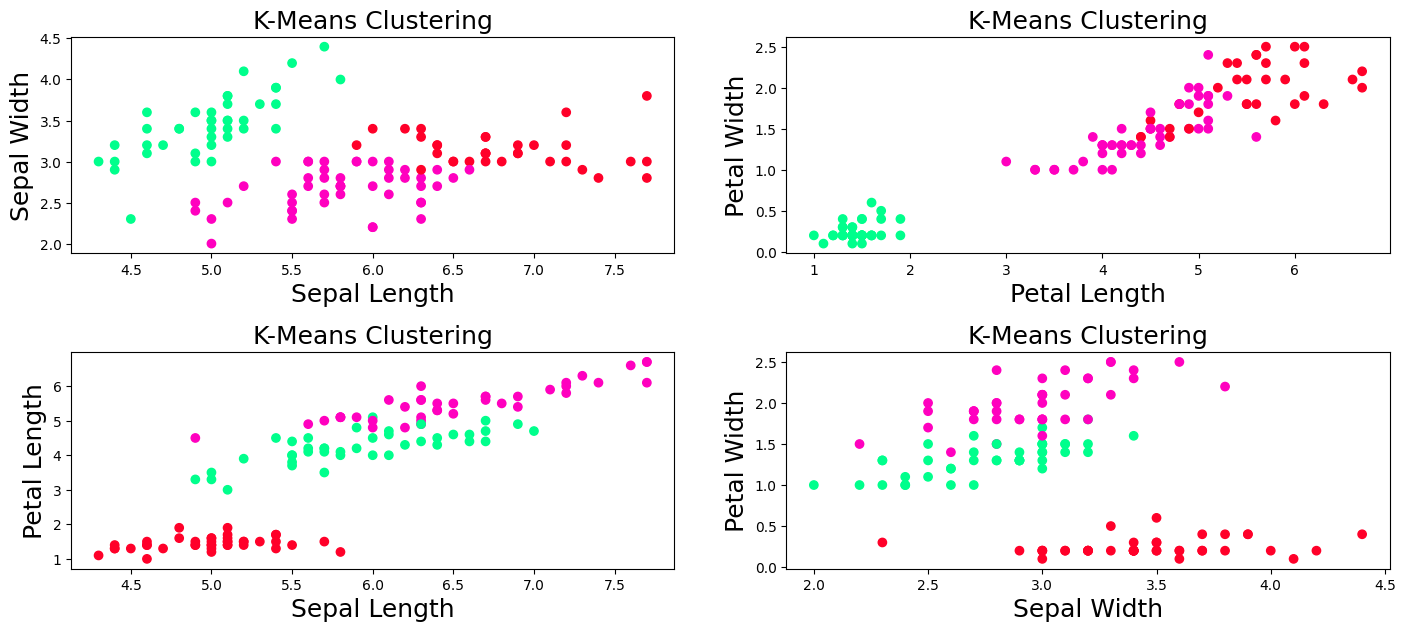

In [528]:
fig, ax = plt.subplots(2, 2, figsize=(15, 7))
fig.tight_layout(pad=5.0)
# set title for each row  


ax[0, 0].scatter(x_train['sepal length (cm)'], x_train['sepal width (cm)'], c=y_train_labels, cmap='gist_rainbow')
ax[0, 0].set_xlabel('Sepal Length', fontsize=18)
ax[0, 0].set_ylabel('Sepal Width', fontsize=18)
ax[0, 0].set_title('K-Means Clustering', fontsize=18)

ax[0, 1].scatter(x_train['petal length (cm)'], x_train['petal width (cm)'], c=y_train_labels, cmap='gist_rainbow')
ax[0, 1].set_xlabel('Petal Length', fontsize=18)
ax[0, 1].set_ylabel('Petal Width', fontsize=18)
ax[0, 1].set_title('K-Means Clustering', fontsize=18)

ax[1, 0].scatter(x_train['sepal length (cm)'], x_train['petal length (cm)'], c=y_train, cmap='gist_rainbow')
ax[1, 0].set_xlabel('Sepal Length', fontsize=18)
ax[1, 0].set_ylabel('Petal Length', fontsize=18)
ax[1, 0].set_title('K-Means Clustering', fontsize=18)

ax[1, 1].scatter(x_train['sepal width (cm)'], x_train['petal width (cm)'], c=y_train, cmap='gist_rainbow')
ax[1, 1].set_xlabel('Sepal Width', fontsize=18)
ax[1, 1].set_ylabel('Petal Width', fontsize=18)
ax[1, 1].set_title('K-Means Clustering', fontsize=18)

In [529]:
y_pred = kmeans.predict(x_test)

C:\Users\ratan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [530]:
from sklearn.metrics import silhouette_score

In [531]:
shilhouette_score = []

for k in range(2, 20):
    kmeans1 = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans1.fit(x_train)
    shilhouette_score.append(silhouette_score(x_train, kmeans1.labels_))

C:\Users\ratan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ratan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ratan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the v

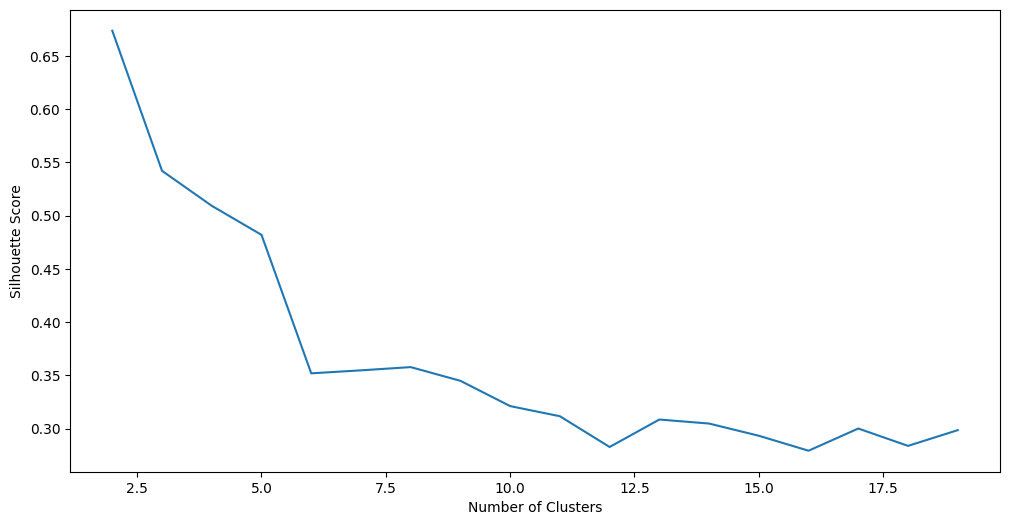

In [532]:
# plot
plt.figure(figsize=(12, 6))
plt.plot(range(2, 20), shilhouette_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

<center style="background-color: #006a4e; color:white"><font size = '5'>Different Implementation</center>

In [ ]:
y_labels_train = kmeans.fit_predict(x_train)

C:\Users\ratan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# get the cluster centers and the cluster labels
print(kmeans.cluster_centers_)
# print(kmeans.labels_)

[[-1.49260415  2.9043594 ]
 [-1.25797694  7.84190232]
 [ 1.99885371  0.86900297]
 [ 0.97487309  4.32971335]]


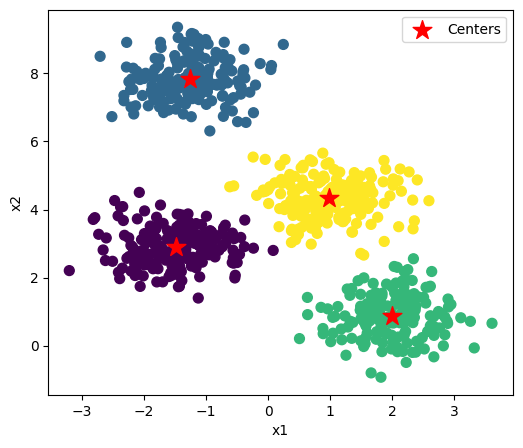

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_labels_train, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200, c='red', label='Centers')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
# shilouette score
from sklearn.metrics import silhouette_score
print(silhouette_score(x_train, kmeans.labels_))

0.6804239188786518


In [ ]:
# elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++')
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)


C:\Users\ratan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ratan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ratan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the v

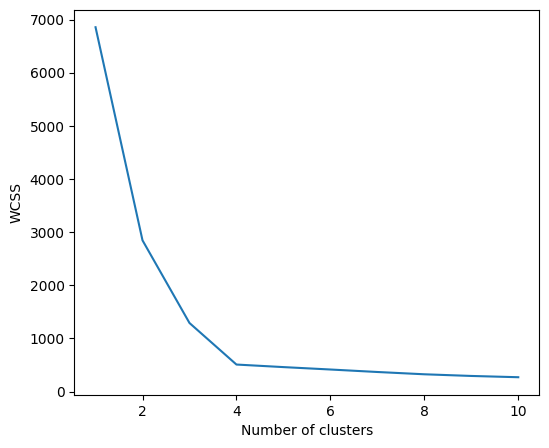

In [ ]:
# elbow graph
plt.figure(figsize=(6, 5))
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
%pip install kneed

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\ratan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# kneed graph
from kneed import KneeLocator
kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
print(kn.knee)

4


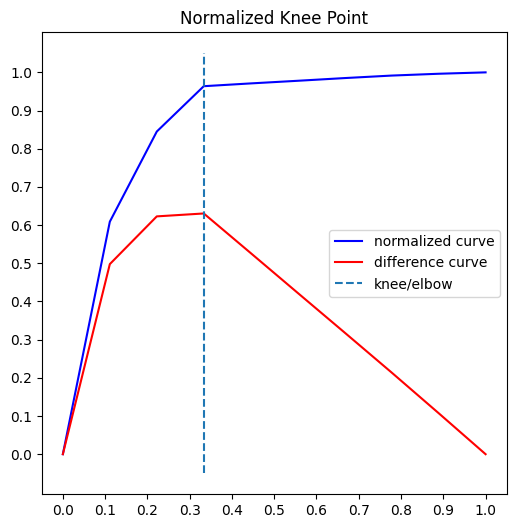

In [ ]:
# graph of kneed
kn.plot_knee_normalized()

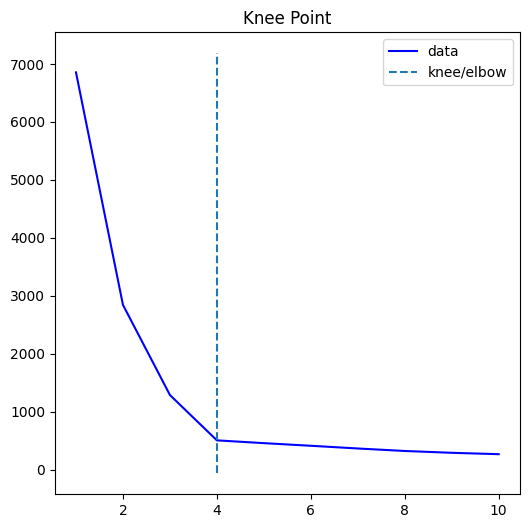

In [ ]:
kn.plot_knee()

[22, 137, 178, 258, 305, 482, 482]
[0.02, 0.14, 0.18, 0.26, 0.3, 0.48, 0.48]


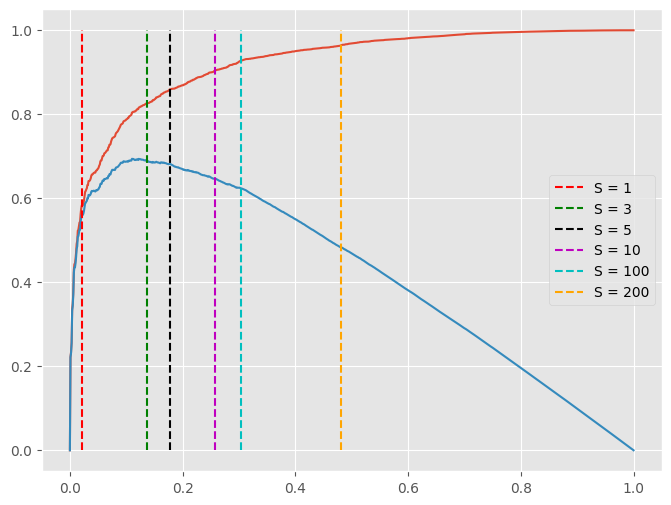

In [ ]:
import numpy as np

np.random.seed(23)

sensitivity = [1, 3, 5, 10, 100, 200, 400]
knees = []
norm_knees = []

n = 1000
x = range(1, n + 1)
y = sorted(np.random.gamma(0.5, 1.0, n), reverse=True)
for s in sensitivity:
    kl = KneeLocator(x, y, curve="convex", direction="decreasing", S=s)
    knees.append(kl.knee)
    norm_knees.append(kl.norm_knee)

print(knees)
[43, 137, 178, 258, 305, 482, 482]

print([nk.round(2) for nk in norm_knees])
[0.04, 0.14, 0.18, 0.26, 0.3, 0.48, 0.48]

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure(figsize=(8, 6))
plt.plot(kl.x_normalized, kl.y_normalized)
plt.plot(kl.x_difference, kl.y_difference)
colors = ["r", "g", "k", "m", "c", "orange"]
for k, c, s in zip(norm_knees, colors, sensitivity):
    plt.vlines(k, 0, 1, linestyles="--", colors=c, label=f"S = {s}")
plt.legend()

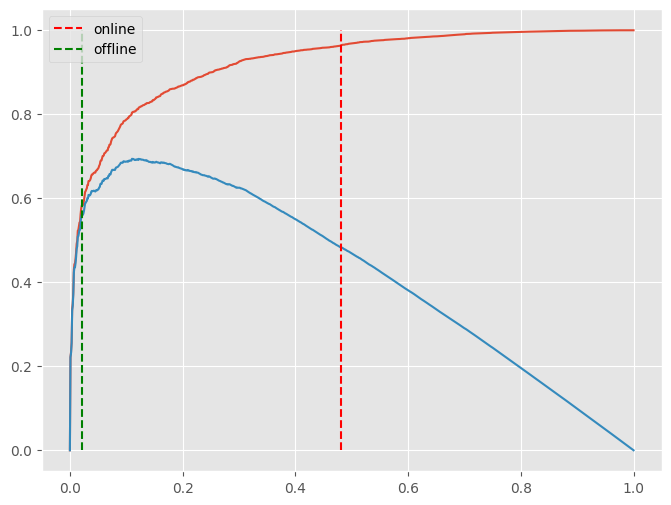

In [ ]:
kl_online = KneeLocator(x, y, curve="convex", direction="decreasing", online=True)
kl_offline = KneeLocator(x, y, curve="convex", direction="decreasing", online=False)

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure(figsize=(8, 6))
plt.plot(kl_online.x_normalized, kl_online.y_normalized)
plt.plot(kl_online.x_difference, kl_online.y_difference)
colors = ["r", "g"]
for k, c, o in zip(
    [kl_online.norm_knee, kl_offline.norm_knee], ["r", "g"], ["online", "offline"]
):
    plt.vlines(k, 0, 1, linestyles="--", colors=c, label=o)
plt.legend()